## Random_forests
## Company_Data

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier

## importing data_set

In [2]:
company=pd.read_csv("D:\\assignment\\Random Forest\\Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
## convering column into numerical values
for column in company.columns:
    le = LabelEncoder()
    company[column] = le.fit_transform(company[column])

In [4]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,255,49,51,11,141,54,0,17,7,1,1
1,297,22,27,16,129,18,1,40,0,1,1
2,267,24,14,10,138,15,2,34,2,1,1
3,158,28,77,4,249,31,2,30,4,1,1
4,37,52,42,3,178,62,0,13,3,1,0


In [8]:
company.shape

(400, 11)

In [9]:
# check the missing value
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [10]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Sales        400 non-null    int64
 1   CompPrice    400 non-null    int64
 2   Income       400 non-null    int64
 3   Advertising  400 non-null    int64
 4   Population   400 non-null    int64
 5   Price        400 non-null    int64
 6   ShelveLoc    400 non-null    int32
 7   Age          400 non-null    int64
 8   Education    400 non-null    int64
 9   Urban        400 non-null    int32
 10  US           400 non-null    int32
dtypes: int32(3), int64(8)
memory usage: 29.8 KB


In [11]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,165.225000,36.055000,46.660000,6.630000,138.645000,49.930000,1.307500,28.322500,3.900000,0.705000,0.645000
std,94.449463,14.883069,27.253556,6.634239,79.495773,21.854499,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,84.750000,26.000000,21.750000,0.000000,71.000000,34.000000,1.000000,14.750000,2.000000,0.000000,0.000000
50%,163.000000,36.000000,47.000000,5.000000,140.000000,51.000000,2.000000,29.500000,4.000000,1.000000,1.000000
75%,243.000000,46.000000,68.000000,12.000000,210.250000,65.000000,2.000000,41.000000,6.000000,1.000000,1.000000
max,335.000000,72.000000,97.000000,27.000000,274.000000,100.000000,2.000000,55.000000,8.000000,1.000000,1.000000


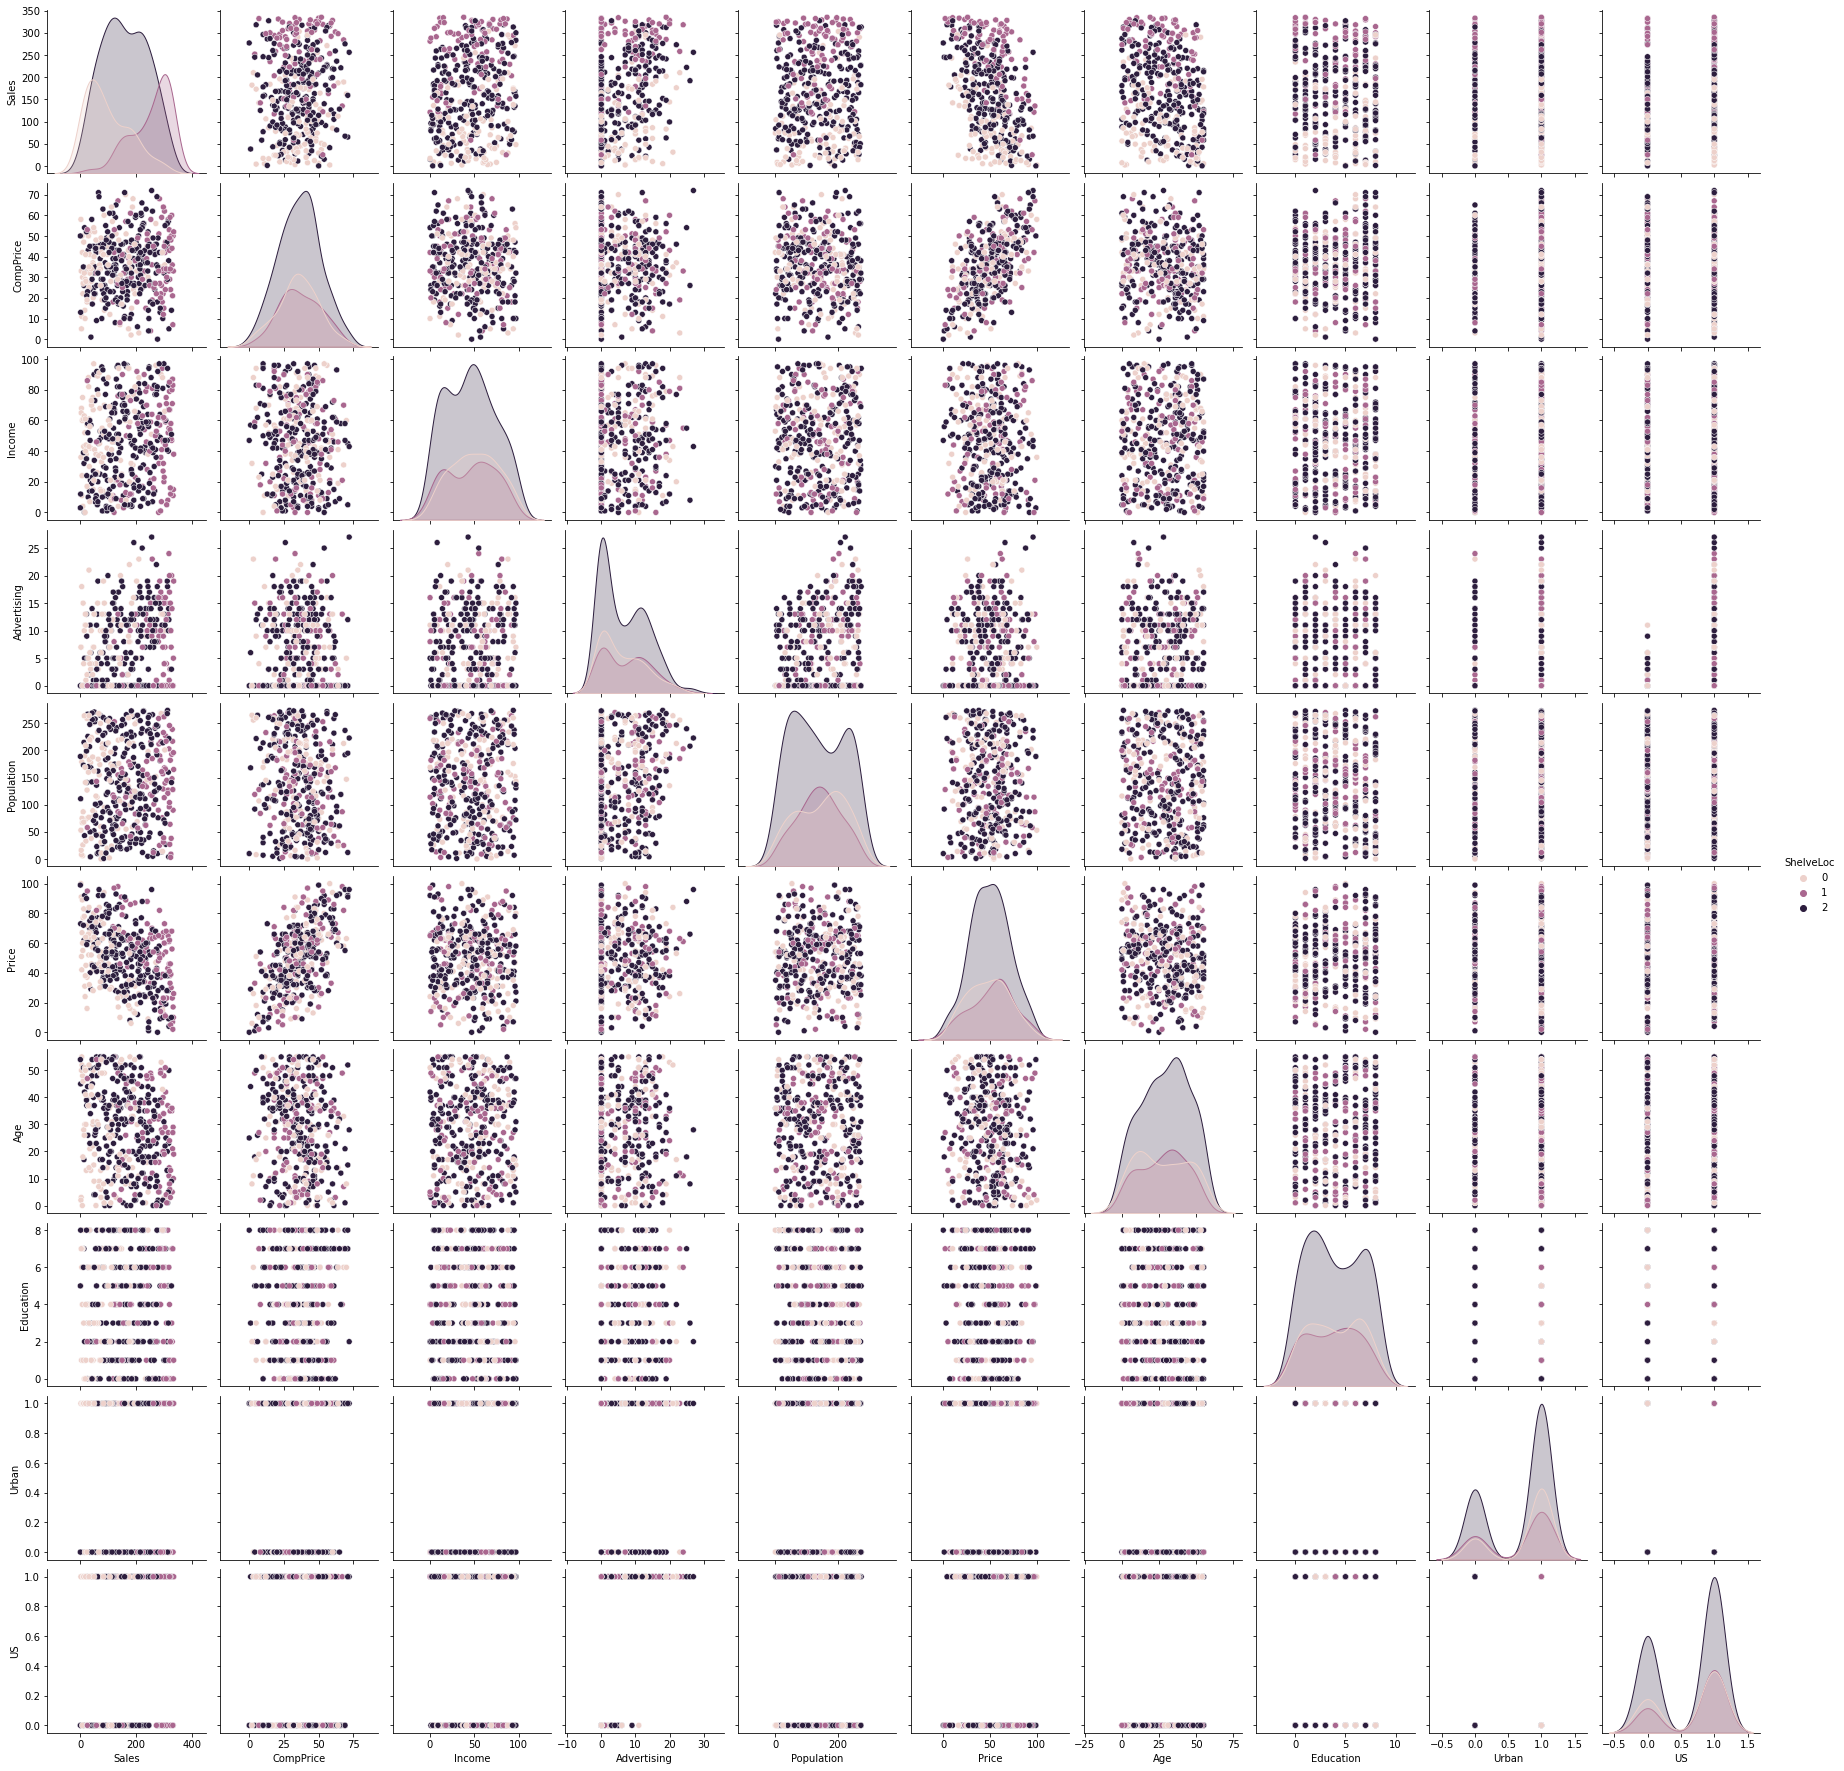

In [7]:
import seaborn as sns
sns.pairplot(data=company,hue='ShelveLoc')

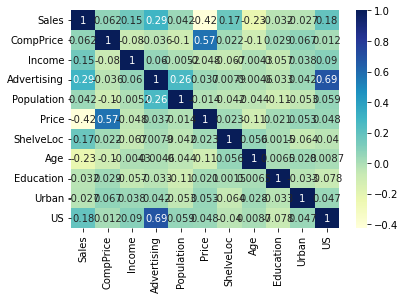

In [12]:
companyplot=sns.heatmap(company.corr(),cmap='YlGnBu',annot=True)

<AxesSubplot:>

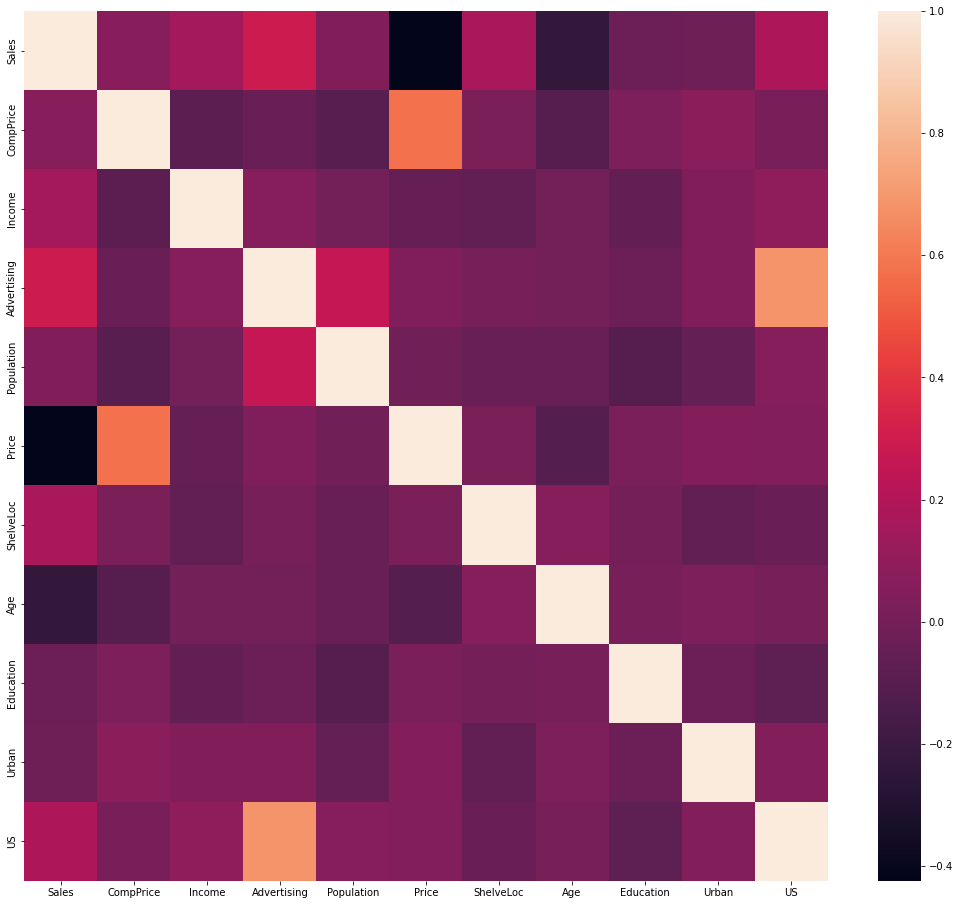

In [48]:
plt.figure(figsize=(18,16))
sns.heatmap(company.corr())

In [49]:
array=company.values
array

array([[255,  49,  51, ...,   7,   1,   1],
       [297,  22,  27, ...,   0,   1,   1],
       [267,  24,  14, ...,   2,   1,   1],
       ...,
       [159,  71,   5, ...,   8,   1,   1],
       [106,  12,  57, ...,   2,   1,   1],
       [262,  45,  16, ...,   6,   1,   1]], dtype=int64)

In [50]:
x=array[:,1:10]
y=array[:,10]

## Fitting Random Forest Regression to the dataset, import the regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x, y) 

RandomForestRegressor(random_state=0)

## Bagging

In [52]:
from sklearn.model_selection import KFold, cross_val_score

In [53]:
kfold = KFold(n_splits = 10, random_state = 42,shuffle=True)
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator = cart, n_estimators = 20, random_state = 42)

In [54]:
results = cross_val_score(model, x, y, cv = kfold)
print(results.mean())

0.8949999999999999


## Random Forest Classification

In [55]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model = RandomForestClassifier(n_estimators = 1000, max_features = 5, criterion = 'gini')


In [56]:
results = cross_val_score(model, x, y, cv = kfold)
print(results.mean())

0.9025000000000001


## AdaBoost Classification

In [57]:
kfold = KFold(n_splits = 10, random_state =42, shuffle = True)
model = AdaBoostClassifier(n_estimators = 10, random_state =42)


In [58]:
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.89


## HistGradient Boosting Classification

In [59]:
from sklearn.ensemble import HistGradientBoostingClassifier


In [60]:
kfold = KFold(n_splits = 10, random_state = 42,shuffle=True)
cart = DecisionTreeClassifier()
model1 =HistGradientBoostingClassifier(random_state =42).fit(x,y)

In [61]:
results = cross_val_score(model1, x, y)
print(results.mean())

0.89


## splitting data set into train and test

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42) 

In [63]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=20,max_depth=3,random_state=42)
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

In [64]:
y_pred

array([0.98060613, 0.99105935, 0.99105935, 0.61218093, 0.14962368,
       0.1897737 , 0.99105935, 0.9854403 , 0.97643947, 0.64686749,
       0.21708951, 0.99105935, 0.2041378 , 0.08270499, 0.99105935,
       0.37465225, 0.83788187, 0.98167663, 0.11933482, 0.98689268,
       0.97979918, 0.9543442 , 0.1468283 , 0.08631303, 0.97750997,
       0.65783453, 0.99105935, 0.10109033, 0.97979918, 0.06154768,
       0.98167663, 0.98167663, 0.66880455, 0.26034357, 0.99105935,
       0.05952065, 0.99105935, 0.99105935, 0.5360486 , 0.06901774,
       0.98060613, 0.96479741, 0.99105935, 0.10640276, 0.60184671,
       0.99105935, 0.1657962 , 0.14145459, 0.9604403 , 0.97418013,
       0.99105935, 0.9604403 , 0.08412226, 0.98060613, 0.99105935,
       0.13716907, 0.99105935, 0.99105935, 0.09488746, 0.06154768,
       0.12715599, 0.72533971, 0.83441667, 0.56526365, 0.15769314,
       0.97979918, 0.98689268, 0.13553872, 0.99105935, 0.99105935,
       0.97979918, 0.97979918, 0.85046605, 0.070435  , 0.83441

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.15981099871494514
Mean Squared Error: 0.08420870659264641
Root Mean Squared Error: 0.2901873646330012


## fitting random forest regressor with 100 Decision Tree

In [66]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestRegressor()

In [67]:
rf.feature_importances_

array([0.04164275, 0.05595355, 0.68264983, 0.07732076, 0.03634978,
       0.01499623, 0.06347724, 0.02135657, 0.0062533 ])

In [68]:
importances = pd.DataFrame(rf.feature_importances_)
importances

,0
0,0.041643
1,0.055954
2,0.682650
3,0.077321
4,0.036350
5,0.014996
6,0.063477
7,0.021357
8,0.006253


In [69]:
x1=company.drop(columns=['ShelveLoc','US'],axis=True)


In [70]:
x2=pd.DataFrame(x1.columns)
column_names=["features"]

In [71]:
x2.rename(columns={'0':'features'},inplace=True)
x2

,0
0,Sales
1,CompPrice
2,Income
3,Advertising
4,Population
5,Price
6,Age
7,Education
8,Urban


In [72]:
feature=pd.concat([x2,importances],axis=1)
feature

,0,0
0,Sales,0.041643
1,CompPrice,0.055954
2,Income,0.682650
3,Advertising,0.077321
4,Population,0.036350
5,Price,0.014996
6,Age,0.063477
7,Education,0.021357
8,Urban,0.006253


<AxesSubplot:>

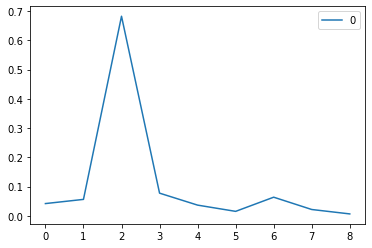

In [73]:
feature.plot()

<AxesSubplot:>

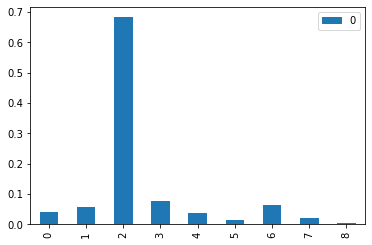

In [74]:
feature.plot(kind='bar')

## as per graph, barplot 2 has more signifincance over other feature
## i.e 'income' is the important attribute feature in high sale.